# Developing a Data Science Project: Three Key Phases to Successful Data Products

By Dr. Phil Winder of [https://WinderResearch.com](https://WinderResearch.com/?utm_source=notebook&utm_campaign=DevelopingADataScienceProject)

Hi there! Welcome to this notebook which was originally written to be used with the training of the same name. If you like this then please [visit my website for more](https://WinderResearch.com/?utm_source=notebook&utm_campaign=DevelopingADataScienceProject). Please feel free to [tweet about this](https://twitter.com/intent/tweet?text=I%27m%20learning%20how%20to%20Develop%20a%20Data%20Science%20Project%20with%20%40DrPhilWinder%20of%20https%3A%2F%2FWinderResearch.com%2F%3Futm_source%3Dtwitter%26utm_campaign%3DDevelopingADataScienceProject), [tweet me direct @DrPhilWinder](https://twitter.com/DrPhilWinder), connect on [Linkedin](https://www.linkedin.com/in/DrPhilWinder/) or plain old [email](mailto:phil@WinderResearch.com). If you need professional help, my company [Winder Research](https://WinderResearch.com/?utm_source=notebook&utm_campaign=DevelopingADataScienceProject) can assist.

Table of Contents:

1. [Visualising Data](#1.-Visualising-Data)
2. [Fixing Scales and Categorical Data](#2:-Fixing-Scales-and-Categorical-Data)
3. [Model Improvement through Feature Selection](#3:-Model-Improvement-through-Feature-Selection)
4. [Dimensionality Reduction](#4.-Dimensionality-Reduction)
5. [Classification](#5.-Classification)
6. [Regression](#6.-Regression)
7. [Clustering](#7.-Clustering)
8. [Numerical Model Evaluation](#8.-Numerical-Model-Evaluation)
9. [Visual Model Evaluation](#8.-Visual-Model-Evaluation)

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
sns.set(style="white")
matplotlib.rc('figure', figsize=[12, 5])

# 1. Visualising Data

This first section is all about visualising your data. In my opinion, manually visualising data is the most important Data Science technique, but also the most underrepresented.

Below I concentrate on demonstrating some techniques that will help you pre-process and clean your data.

In [3]:
import pandas as pd
import missingno as msno
import numpy as np

In [4]:
url = "../data/titanic.csv"
titanic = pd.read_csv(url)

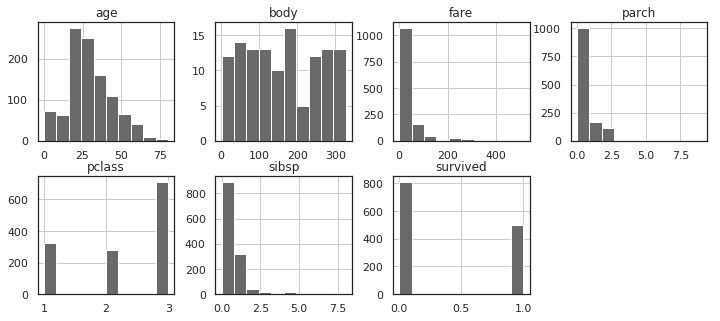

In [5]:
titanic.hist(color='dimgray', layout=(2, 4));

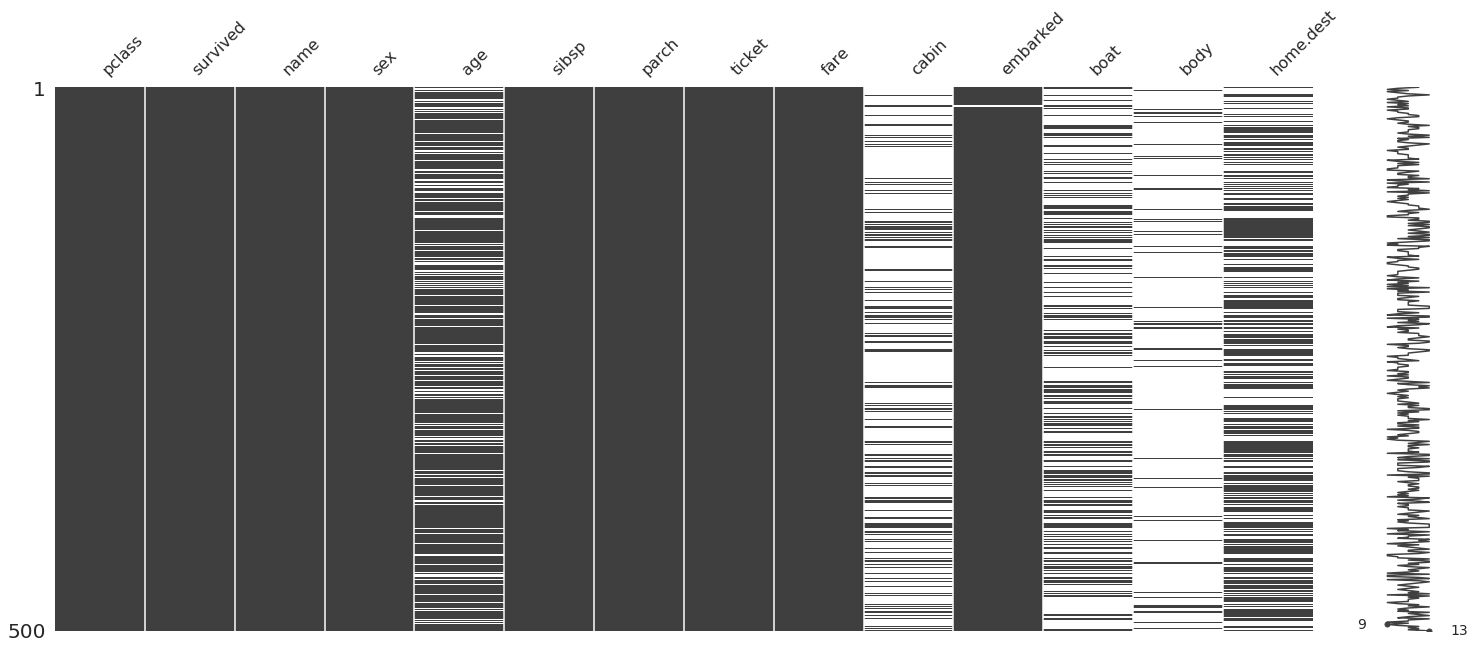

In [6]:
msno.matrix(titanic.sample(500));

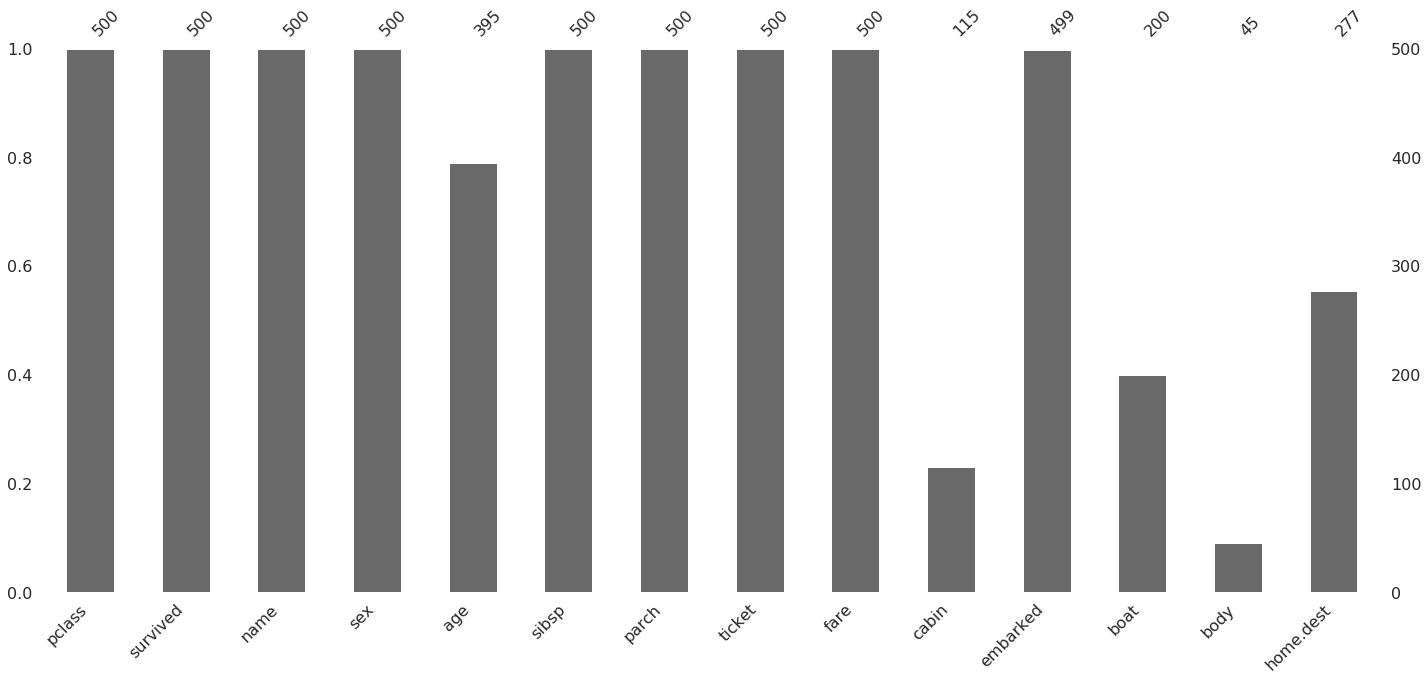

In [7]:
msno.bar(titanic.sample(500));

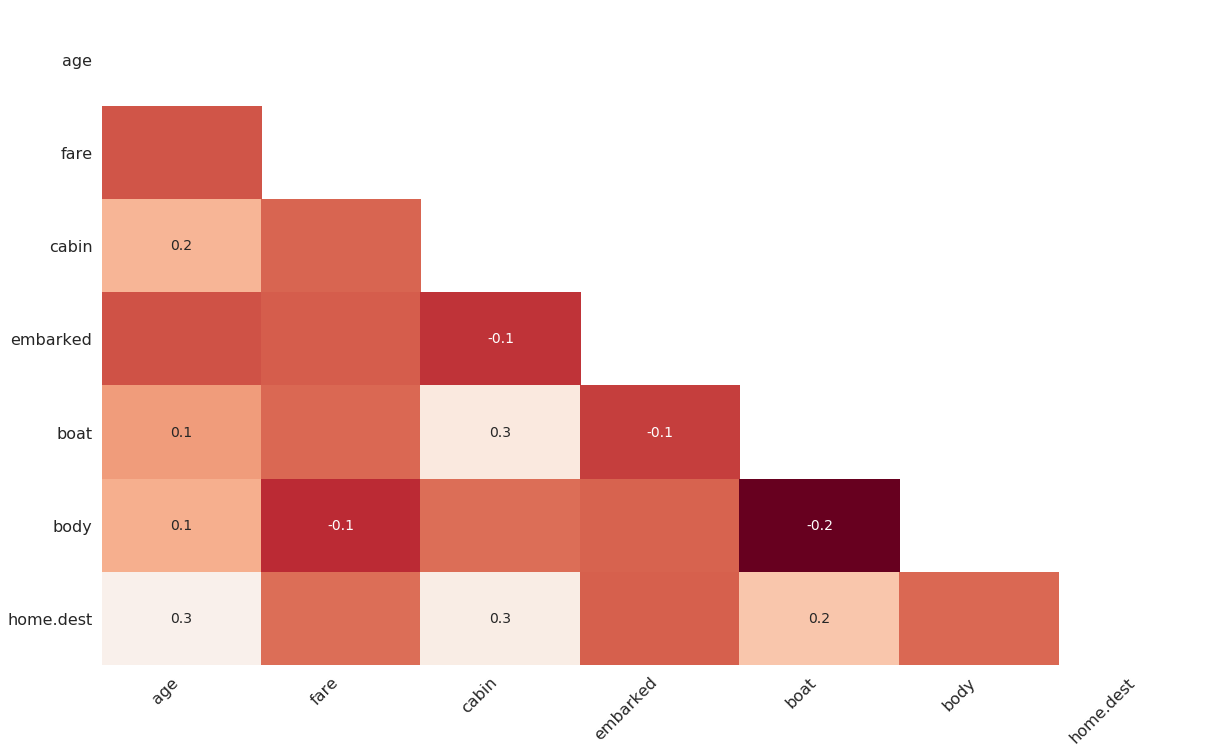

In [8]:
msno.heatmap(titanic);

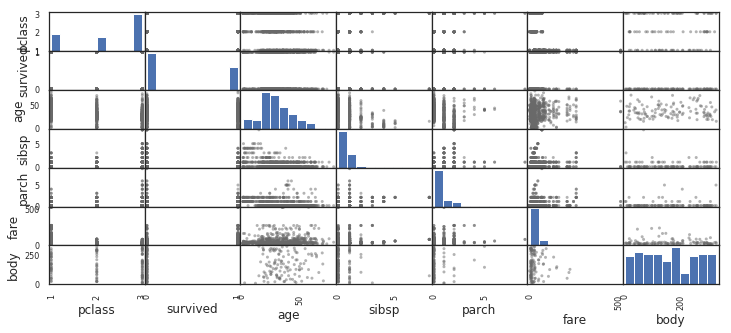

In [9]:
pd.plotting.scatter_matrix(titanic, color='dimgray');

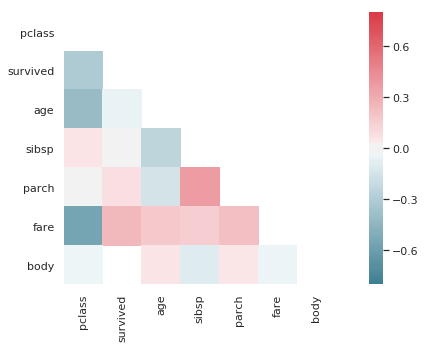

In [10]:
# Compute the correlation matrix
corr = titanic.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, square=True);

In [11]:
url = "../data/nypd-motor-vehicle-collisions.csv"
collisions = pd.read_csv(url)

---
## Challenge

Above is the NYPD collisions dataset that reports the causes of traffic incidents in New York (not to be confused with York) in the USA.

- Try plotting some visualisations of this data
- What can you tell me about it?

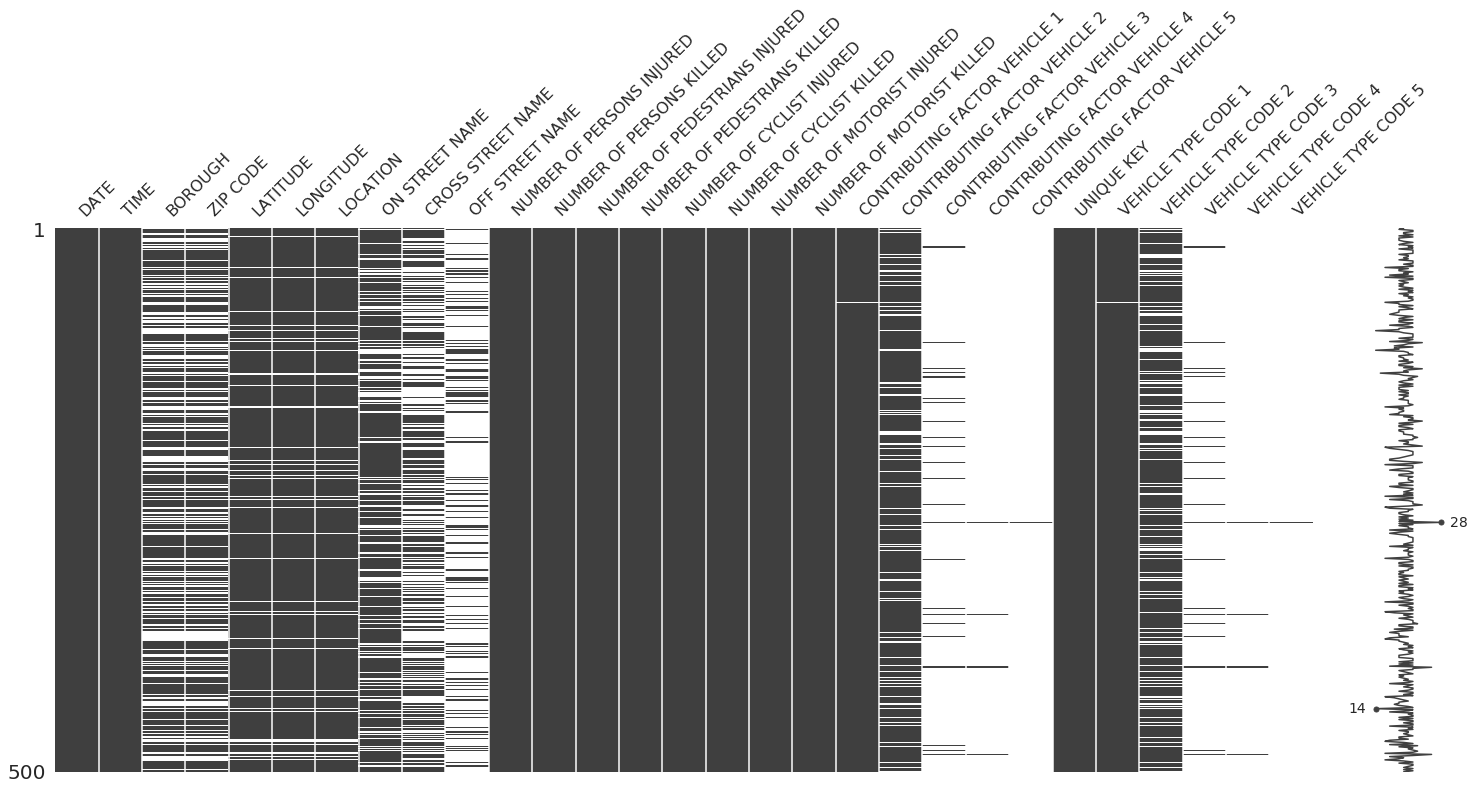

In [12]:
msno.matrix(collisions.sample(500));

---

# 2: Fixing Scales and Categorical Data

Fixing the scales of data is important to make it as easy as possible for the model. This is a classification example - where I limit the number of training iterations to make the point - that breaks because the scales are so skewed. After min-max scaling the data, the model finds it much easier to iterate towards the result.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing
import sklearn.svm

In [14]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

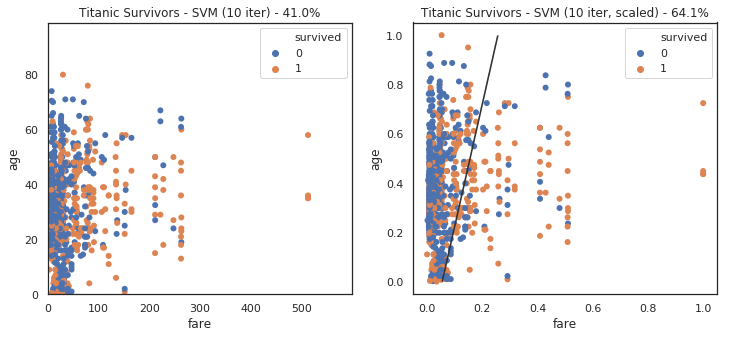

In [15]:
np.random.seed(42)
url = "../data/titanic.csv"
titanic = pd.read_csv(url)
titanic = titanic[['survived', 'fare', 'age']]
titanic.dropna(inplace=True)
titanic = titanic[(titanic[['fare', 'age']] != 0).all(axis=1)]  # Remove zero fares
y = titanic['survived']
X = titanic[['fare', 'age']]

clf = sklearn.svm.LinearSVC(tol=1e-2, max_iter=10).fit(X, y)
xx, yy = np.mgrid[0:600:1, 0:100:1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict(grid).reshape(xx.shape)
score = clf.score(X, y) * 100

fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.scatterplot(data=X, x='fare', y='age', hue=y, linewidth=0, ax=ax1).set_title(
    "Titanic Survivors - SVM (10 iter) - {:.1f}%".format(score))
ax1.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

X[:] = sklearn.preprocessing.MinMaxScaler().fit_transform(X[:])
clf = sklearn.svm.LinearSVC(tol=1e-2, max_iter=10).fit(X, y)
xx, yy = np.mgrid[0:1:0.001, 0:1:0.001]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict(grid).reshape(xx.shape)
score = clf.score(X, y) * 100

sns.scatterplot(data=X, x='fare', y='age', hue=y, linewidth=0, ax=ax2).set_title(
    "Titanic Survivors - SVM (10 iter, scaled) - {:.1f}%".format(score))
ax2.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6);

In [16]:
s = pd.Series(list('abcaba'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,1,0,0


Above we're rencoding categorical variables into new features. Now we can pass this data into our standard models.

In [17]:
url = "../data/titanic.csv"
titanic = pd.read_csv(url)

In [18]:
X = titanic[['age', 'embarked', 'fare', 'survived']]
X = X.dropna()
y = X[['survived']]
X = X[['age', 'embarked', 'fare']]

---
## Challenge

Above we see the Titanic data again. 

- Try to recode the `embarked` feature (hint: you can run `get_dummies` directly on the X matrix. Pandas is smart enough not to recode the other features)
- (Bonus for advanced users) Then use the features X to predict the label y in a classification model

In [19]:
pd.get_dummies(X).sample(5)

,age,fare,embarked_C,embarked_Q,embarked_S
1298,36.00,9.500,0,0,1
321,62.00,26.550,0,0,1
590,0.92,27.750,0,0,1
935,29.00,22.025,0,0,1
704,21.00,8.050,0,0,1


---

# 3: Model Improvement through Feature Selection

The Decision Tree classifier (and variants of) attempts to segment the data into "pure" buckets via simple thresholds. The split that produces the most "pure" bucket is deemed to be a good split.

We can use this definition of "good" to provide some information about how well a single feature is able to split segment the data according to the labels. "Better" features will have a higher score.

The example below uses the titanic dataset again to demonstrate this.

In [20]:
import pandas as pd
import sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [21]:
url = "../data/titanic.csv"
titanic = pd.read_csv(url)
X = titanic[['age', 'fare', 'survived']]
X = X.dropna()
y = X[['survived']]
X = X[['age', 'fare']]

In [22]:
mdl = sklearn.tree.DecisionTreeClassifier().fit(X, y)

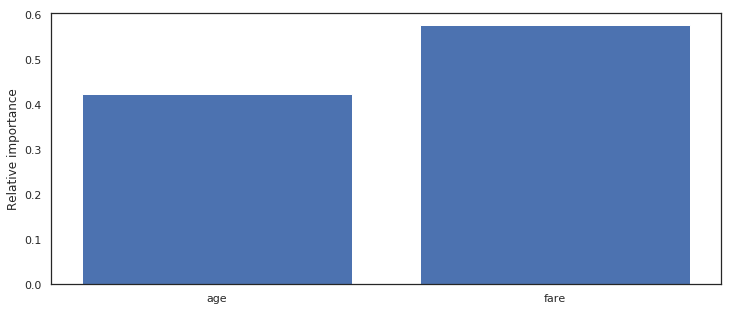

In [23]:
plt.bar(X.columns, mdl.feature_importances_)
plt.gca().set_ylabel('Relative importance');

We can see that the `fare` feature is more informative than the `age` parameter.

### Brute Force

Another thing we can do is iterate over features to find the best combination. Let's use `mlxtend` to implement this for us (and borrow an example)

In [24]:
!pip install mlxtend > /dev/null

best combination (ACC: 0.992): (0, 1, 2, 3, 6, 8, 9, 10, 11, 12)



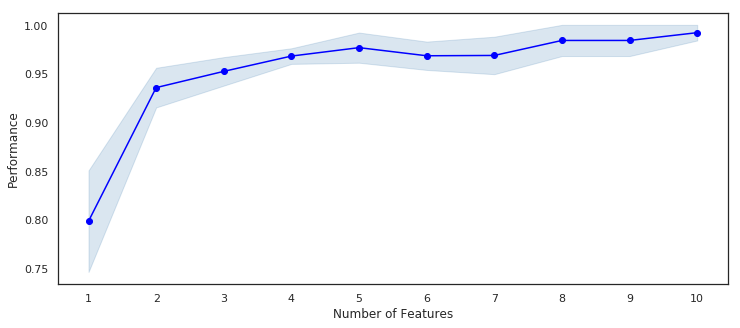

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = wine_data()
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=1)

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(estimator=knn, 
           k_features=(3, 10),
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
# print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');

In [26]:
iris = load_iris()
X = iris.data
y = iris.target
X_feature_names = iris.feature_names

---
## Challenge

Above is the infamous iris dataset.

- Can you tell me which feature is the most informative?

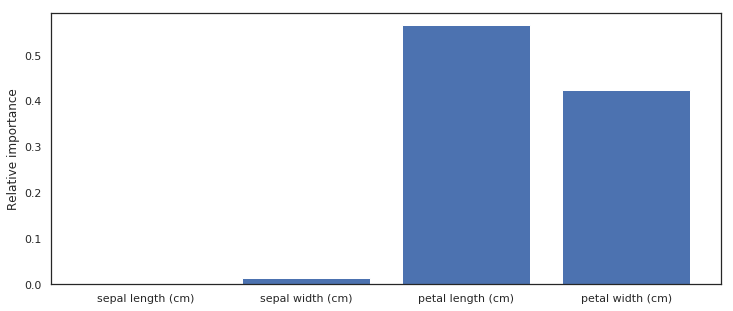

In [27]:
mdl = sklearn.tree.DecisionTreeClassifier().fit(X, y)
plt.bar(X_feature_names, mdl.feature_importances_)
plt.gca().set_ylabel('Relative importance');

---

# 4. Dimensionality Reduction

This section introduces the practical applications of dimensionality reduction.

The first thing you will notice is that it allows us to take a high-dimensional dataset and visualise it in two dimensions. Visualisation is so important and this is one of the main reasons for performing it.

Second, you won't notice much here, but when you start using larger datasets with high numbers of dimensions, you will not want to wait all night just to run one train of your algorithm.

We've touched on some concepts before (e.g. collinearity) and they crop up again here.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets, linear_model

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## PCA

The iris dataset has four components. Let's measure how much each of the four principal components explains the total variance.

In [30]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
pca.explained_variance_ratio_

array([ 0.92461872,  0.05306648,  0.01710261,  0.00521218])

The first component explains a whopping 92% of the variance. Most rules of thumb would probably get you to just cut it off there. Let's see what the first PC looks like after transforming the data into the new domain (`.transform` effectively does the dot-product projection for us)

In [31]:
X_p = pca.transform(X)

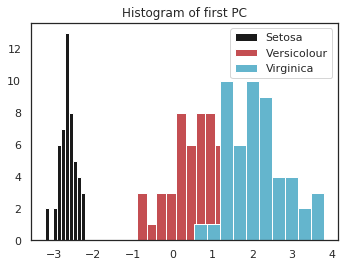

In [32]:
fig = plt.figure(figsize=(5.5,4))
plt.title('Histogram of first PC')
plt.hist(X_p[y==0, 0], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 0], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 0], facecolor='c', label="Virginica")
plt.legend()
plt.show()

We can see that Setosa is well separated. The other two are not quite as separated, but appear to show a good normal distribution.

Let's take a look at what the second dimesion looks like.

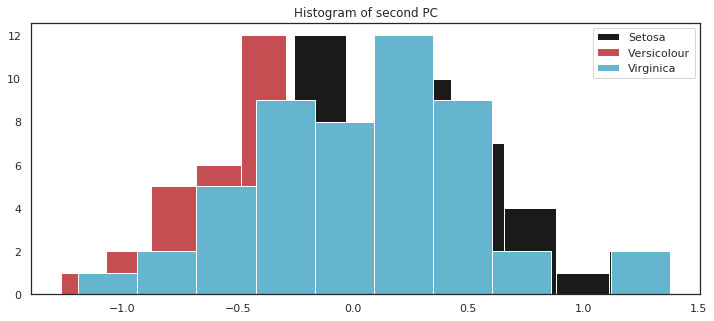

In [33]:
fig = plt.figure()
plt.title('Histogram of second PC')
plt.hist(X_p[y==0, 1], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 1], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 1], facecolor='c', label="Virginica")
plt.legend()
plt.show()

Notice how little variance this second dimension shows compared to the first. (I.e. look at the min/max of the first plot and compare to this).

Generally you will find that the components with more variance generally have better class separation (because the high variance is accounted by the class separation, not the variance of each class)

If you look below, the third looks even worse.

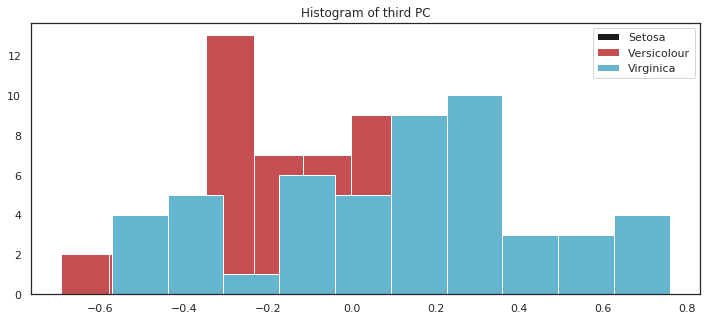

In [34]:
fig = plt.figure()
plt.title('Histogram of third PC')
plt.hist(X_p[y==0, 2], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 2], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 2], facecolor='c', label="Virginica")
plt.legend()
plt.show()

Now let's take a look at the data in two dimensions.

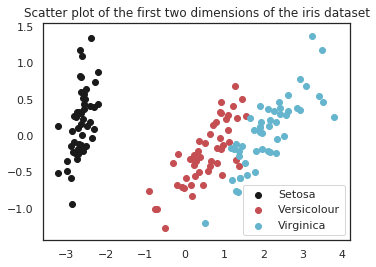

In [35]:
fig = plt.figure(figsize=(5.5,4))
plt.title('Scatter plot of the first two dimensions of the iris dataset')
plt.scatter(X_p[y==0, 0], X_p[y==0, 1], c='k', label="Setosa")
plt.scatter(X_p[y==1, 0], X_p[y==1, 1], c='r', label="Versicolour")
plt.scatter(X_p[y==2, 0], X_p[y==2, 1], c='c', label="Virginica")
plt.legend()
plt.show()

Again, you can see that there is a large variance in the first (x) dimension, a range of +/- 4, whereas the second dimension (y) only has +/- 1.

### PCA with Classification

Now we will:

- Using a logistic classifier, classify the iris dataset
- Calculate the accuracy score (or score of your choice)
- Now perform PCA and reduce to a single component. Repeat the classification and scoring.
- How much different is the result? Is it significant?

In [36]:
mdl = linear_model.LogisticRegression()
print("No PCA accuracy:", mdl.fit(X, y).score(X, y))

No PCA accuracy: 0.96


In [37]:
mdl = linear_model.LogisticRegression()
print("With PCA (first componennt) accuracy:", mdl.fit(X_p[:,0].reshape(150,1), y).score(X_p[:,0].reshape(150,1), y))

With PCA (first componennt) accuracy: 0.9


In [38]:
mdl = linear_model.LogisticRegression()
print("With PCA (two components) accuracy:", mdl.fit(X_p[:,0:1], y).score(X_p[:,0:1], y))

With PCA (two components) accuracy: 0.9


You can see that we have marginally reduced accuracy. Often, people like to reduce the number of dimensions to 2 or 3 for plotting, then increase it back up for actual classification.

This becomes a compromise between simplicity/performance and accuracy.

In [39]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

---
## Challenge

Above is the slightly more complex wine dataset. 

- How much of the variance is represented by the first principal component?
- (Bonus) Plot the first principal component

In [40]:
pca = decomposition.PCA(n_components=13)
pca.fit(X)
pca.explained_variance_ratio_

array([  9.98091230e-01,   1.73591562e-03,   9.49589576e-05,
         5.02173562e-05,   1.23636847e-05,   8.46213034e-06,
         2.80681456e-06,   1.52308053e-06,   1.12783044e-06,
         7.21415811e-07,   3.78060267e-07,   2.12013755e-07,
         8.25392788e-08])

In [41]:
X_p = pca.transform(X)

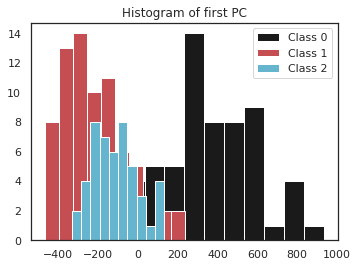

In [42]:
fig = plt.figure(figsize=(5.5,4))
plt.title('Histogram of first PC')
plt.hist(X_p[y==0, 0], facecolor='k', label="Class 0")
plt.hist(X_p[y==1, 0], facecolor='r', label="Class 1")
plt.hist(X_p[y==2, 0], facecolor='c', label="Class 2")
plt.legend()
plt.show()

---

# 5. Classification

This section introduces classification, the task of attempting to predict which class an observation belongs to. Usually there are significantly less classes than observations, because the models need lots of examples to learn from.

There are tens of core types of classification model, possibly hundreds of known variations. They are all trying to place a decision boundary within the dimensions of your data to separate the classes.

Generally speaking, you want to pick the simplest model you can to solve your problem. In these examples we will use a Decision Tree. They are very simple to undertand and perform remarkably well in most situations.

We'll have a look at a complex dataset first, then you can look at the oranges and apples dataset.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.tree
from sklearn.model_selection import train_test_split

In [44]:
url = "../data/cereal.csv"
cereal = pd.read_csv(url)

In [45]:
print(cereal.columns)
cereal

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [46]:
X = cereal[['potass','rating']]
mfrs = cereal.mfr.astype('category')
y = mfrs.cat.codes
print("There are {} manufacturers in this dataset.".format(len(set(y))))

There are 7 manufacturers in this dataset.


In [47]:
# Create a decision tree classifier and train
clf = sklearn.tree.DecisionTreeClassifier().fit(X, y)

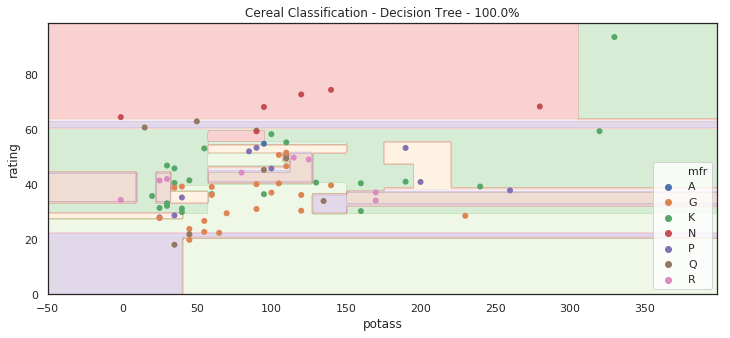

In [48]:
# Create a mesh grid to see what the prediction would be at all of these points
xx, yy = np.mgrid[-50:400:1, 0:100:1]
grid = np.c_[xx.ravel(), yy.ravel()]

# Get the predictions at each point
probs = clf.predict(grid).reshape(xx.shape)

# Calculate the accuracy for plotting in the title
score = clf.score(X, y) * 100

# Plot the decision boundary and the datapoints
ax = plt.gca()
ax.contourf(xx, yy, probs, cmap=plt.cm.Paired, alpha=0.2)
sns.scatterplot(data=X, x='potass', y='rating', hue=mfrs, linewidth=0).set_title(
    "Cereal Classification - Decision Tree - {:.1f}%".format(score))
plt.legend(loc='lower right')
plt.show()

So both the classifiers above have scored 100%. But all is not as it seems. First, remember that we should be sceptical about 100%. Next, look at how complicated that decision boundary is for the second example.

The solution to this is to split the dataset. We split into a training dataset and a testing dataset.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
clf = sklearn.tree.DecisionTreeClassifier().fit(X_train, y_train)

In [51]:
score = clf.score(X_test, y_test) * 100
print("{:.1f}%".format(score))

42.3%


Look at that score now! Far lower. There are seven manufacturers here, so randomly picking one would result in a score of 1/7=14%. So we're doing better than random, but certainly not 100%.

In [52]:
# Import some fruit data
url = "../data/fruits.tsv"
fruit = pd.read_csv(url, sep='\t')

# Throw away all data except apples and oranges
fruit = fruit.query('(fruit_name == "apple") | (fruit_name == "orange")')
fruit_names = fruit.fruit_name

# Throw away all features except mass and color_score
X = fruit[['mass', 'color_score']]
y = fruit.fruit_label
# Recode the orange label (a `3`) to a 1 so we have 0=apple, 1=orange
y = y.replace(3, 0)

---

## Challenge

Can you now try and classifiy the orange and apples dataset yourself?

- Only get the "score" to keep this quick and simple. Don't worry about plotting right now.
- Try with and without a train test split if you have time

In [53]:
# Create a decision tree classifier and train
clf = sklearn.tree.DecisionTreeClassifier().fit(X, y)

score = clf.score(X, y) * 100
print("Before splitting: {:.1f}%".format(score))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a decision tree classifier and train
clf = sklearn.tree.DecisionTreeClassifier().fit(X_train, y_train)

score = clf.score(X_test, y_test) * 100
print("After splitting: {:.1f}%".format(score))

Before splitting: 100.0%
After splitting: 92.3%


---

# 6. Regression

Often I provide examples of standard regression with some sort of model. I.e. drawing the best fit line through a series of points. 

But this time I'd like to show you about exponential smoothing. This is a useful tool for generating good short-term predictions in a simple way.

The simplest form of exponential smoothing would predict an average of the past few values, so only the first prediction would be reasonable. The `Holt` method adds a trend element to the model to attempt to model the trend. This is plotted below. The most advanced "simple" method attempts to model the seasonality in the data too, but for this you need to tell the model over what period the seasonality fluctuates.

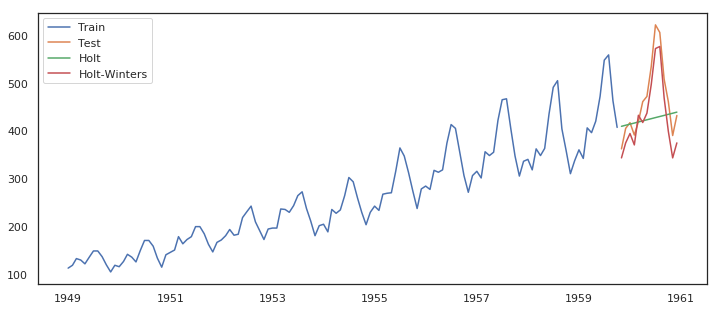

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

url = "../data/airline-passengers.csv"
airline = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
airline.index.freq = 'MS'
train, test = airline.iloc[:130, 0], airline.iloc[130:, 0]
mdl_holt = Holt(train).fit()
mdl_holtwinters = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred_holt = mdl_holt.predict(start=test.index[0], end=test.index[-1])
pred_holtwinters = mdl_holtwinters.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_holt.index, pred_holt, label='Holt')
plt.plot(pred_holtwinters.index, pred_holtwinters, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [55]:
url = "../data/sunspots.csv"
sunspots = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
sunspots = sunspots[['Monthly Mean Total Sunspot Number']]

---

## Challenge

- Can you make any predictions on this dataset?

Hints: This is a bit tricky because the data isn't quite as nice. It is seasonal, but the seasonality isn't quite as clear as the airline data.

- First plot the data to get a closer look. (`sunspots.plot()` and `sunspots.iloc[0:300].plot()`)
- Next, use the simple exponential smoothing (`Holt`) and plot the result. It should show a straight line from the last point.
- Finally, try and create a full on Holt-Winters (`ExponentialSmoothing`). Use no trend parameter, there is little to no trend. Use an `additive` seasonal parameter. Try setting the `seasonal_periods` to 12 (one year). What happens? What about 150 (or there abouts, approx 12 years)?

In [56]:
train, test = sunspots.iloc[:1000, 0], sunspots.iloc[1000:1500, 0]
mdl_holt = Holt(train).fit()
mdl_holtwinters = ExponentialSmoothing(train, seasonal='additive', seasonal_periods=150).fit()
pred_holt = mdl_holt.predict(start=test.index[0], end=test.index[-1])
pred_holtwinters = mdl_holtwinters.predict(start=test.index[0], end=test.index[-1])

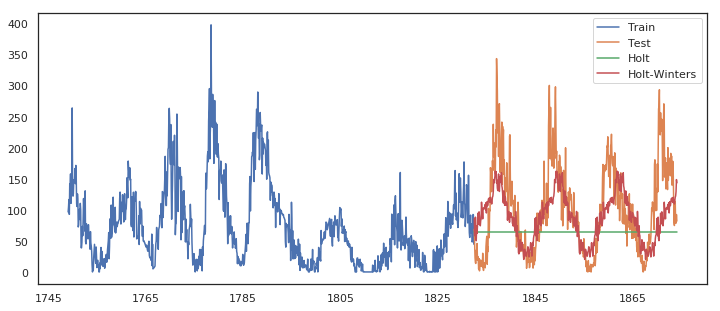

In [57]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_holt.index, pred_holt, label='Holt')
plt.plot(pred_holtwinters.index, pred_holtwinters, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

---


# 7. Clustering

Dendrograms are hierarchical plots of clusters where the length of the bars represent the distance to the next cluster centre.

We can lean on our other general purpose data science library `scipy` to provide us with a method to plots dendrograms. Unfortunately we also have to use `scipy`s linkage methods, rather than `sklearn`s because of some expected parameters.

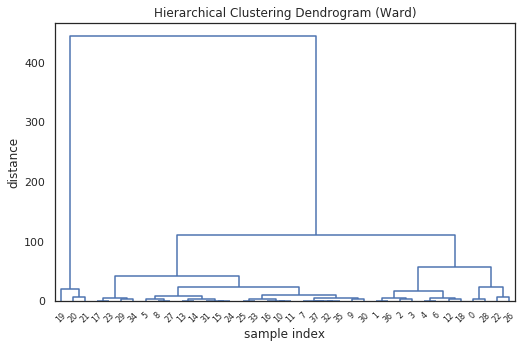

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

Wooohey that's a lot of legs. Let's cut a few off to be able to take a better look at the data...

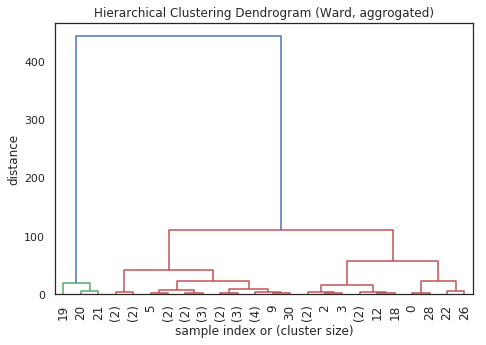

In [59]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

Ok, now we've honed our artistic skills, let's put them to the test in the whiskey data set.

## A look at the whiskey dataset

Let's load it in again.

In [60]:
whiskey = pd.read_csv('../data/whiskies.csv')
cols = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
X = whiskey[cols]
distillery_labels = whiskey['Distillery'].as_matrix()
display(X.head())
display(distillery_labels)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


array(['Aberfeldy', 'Aberlour', 'AnCnoc', 'Ardbeg', 'Ardmore',
       'ArranIsleOf', 'Auchentoshan', 'Auchroisk', 'Aultmore', 'Balblair',
       'Balmenach', 'Belvenie', 'BenNevis', 'Benriach', 'Benrinnes',
       'Benromach', 'Bladnoch', 'BlairAthol', 'Bowmore', 'Bruichladdich',
       'Bunnahabhain', 'Caol Ila', 'Cardhu', 'Clynelish', 'Craigallechie',
       'Craigganmore', 'Dailuaine', 'Dalmore', 'Dalwhinnie', 'Deanston',
       'Dufftown', 'Edradour', 'GlenDeveronMacduff', 'GlenElgin',
       'GlenGarioch', 'GlenGrant', 'GlenKeith', 'GlenMoray', 'GlenOrd',
       'GlenScotia', 'GlenSpey', 'Glenallachie', 'Glendronach',
       'Glendullan', 'Glenfarclas', 'Glenfiddich', 'Glengoyne',
       'Glenkinchie', 'Glenlivet', 'Glenlossie', 'Glenmorangie',
       'Glenrothes', 'Glenturret', 'Highland Park', 'Inchgower', 'Jura',
       'Knochando', 'Lagavulin', 'Laphroig', 'Linkwood', 'Loch Lomond',
       'Longmorn', 'Macallan', 'Mannochmore', 'Miltonduff', 'Mortlach',
       'Oban', 'OldFett

### Tasks:

- Plot a dendrogram of the whiskey data

Hint: pass the parameter `labels=distillery_labels` to write the distillery names rather than index numbers. And remove the `truncate_mode` and `p` parameters.

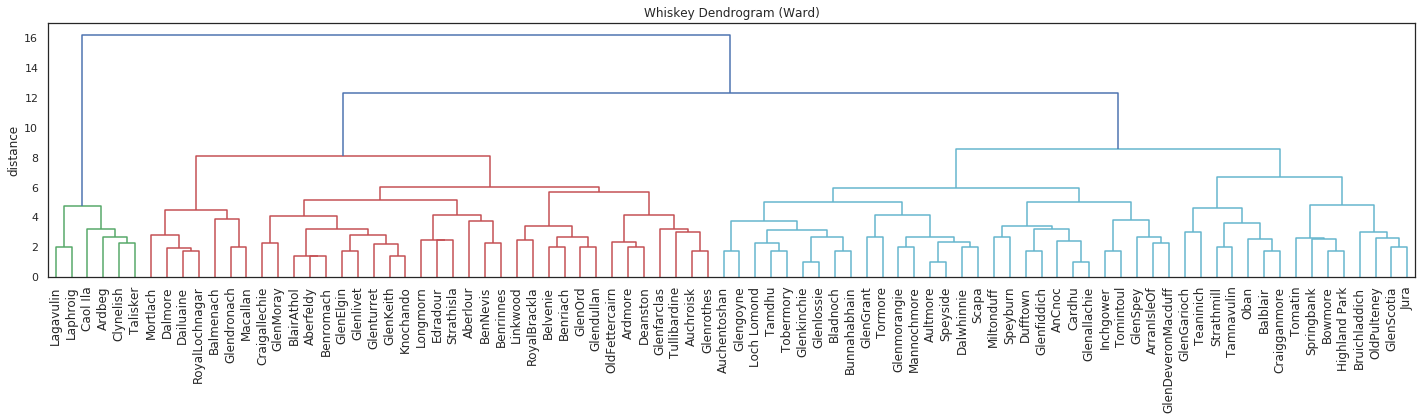

In [61]:
linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(20, 6))
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,
    leaf_font_size=12.,
    labels=distillery_labels,
)
plt.title('Whiskey Dendrogram (Ward)')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

---

# 8. Numerical Model Evaluation

Being able to quantify performance is critical in the process of developing a model. You need to know how well you are solving the problem. You can only do that if you have some ground truth to compare yourself against (i.e. labels).

If at all possible, always try and convert the evaluation metric into a unit that everyone can understand. Most often this is profit/loss, but that depends on what domain you are working in. It could be "number of new subscribers" or "lives saved".

In this section we're going to take a quick look at generating a confusion matrix and some technical measures. Confusion matrices help you how your model made an error.

In [62]:
from sklearn import metrics
import numpy as np
from sklearn import datasets, linear_model, tree
import pandas as pd

In [63]:
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
mdl = linear_model.LogisticRegression()
print("Accuracy:", mdl.fit(X_train, y_train).score(X_test, y_test))
y_pred = mdl.predict(X_test)

Accuracy: 0.961279461279


In [64]:
print(metrics.confusion_matrix(y_test, y_pred))

[[54  0  0  0  1  0  0  0  0  0]
 [ 0 50  1  0  0  0  0  0  4  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  1  0]
 [ 0  1  0  0 63  0  0  0  0  0]
 [ 0  2  1  0  0 68  0  1  1  0]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  0  0  0  1  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  5 63]]


The confusion matrix above deserves some explanation. This is the digits dataset (8x8 images of written digits) and we're trying to predict which digit it is. So the label in this case is the number from zero to nine. I.e. ten classes.

The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) generated by sklearn is different from the way you would see it in the literature. This is zero indexed and the actual class is down the rows. So the top left cell should be a value of 0 and once it predicted that it was a 4. The bottom left row should be a 9 and it was predicted as a 9 63 times. But 5 times it was predicted to be an 8.

Now let's generate some technical metrics.

In [65]:
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: {:0.3f}".format(metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1 Score: {:0.3f}".format(metrics.f1_score(y_test, y_pred, average="macro")))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.961
Balanced Accuracy: 0.963
F1 Score: 0.961
Precision: 0.962
Recall: 0.963


Only when performance is generally very good do we appoach similar scores across these variety of metrics.

Note that we could have calculated more (e.g. AUC), but it would require more code, because some sklearn metrics only work with binary classes.

In [66]:
# Import some fruit data
url = "../data/fruits.tsv"
fruit = pd.read_csv(url, sep='\t')

# Throw away all data except apples and oranges
fruit = fruit.query('(fruit_name == "apple") | (fruit_name == "orange")')
fruit_names = fruit.fruit_name

# Throw away all features except mass and color_score
X = fruit[['mass', 'color_score']]
y = fruit.fruit_label
# Recode the orange label (a `3`) to a 1 so we have 0=apple, 1=orange
y = y.replace(3, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

---

### Tasks:

- Generate the confusion matrix for the data above. How is the model getting it wrong?
- Generate some metrics for the results above. What does that tell you?

In [68]:
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: {:0.3f}".format(metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1 Score: {:0.3f}".format(metrics.f1_score(y_test, y_pred, average="macro")))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test, y_pred, average="macro")))

[[6 0]
 [1 6]]
Accuracy: 0.923
Balanced Accuracy: 0.929
F1 Score: 0.923
Precision: 0.929
Recall: 0.929


---

# 9. Visual Evaluation

Visual evaluation can often be more useful because your eyes find it easier to spot differences or issues better than when just looking at raw numbers. Here we're going to look at plotting a ROC curve, which is the number one way of visualising classifier performance.

Other visualisations do exist and can be better in certain situations. For example, you wouldn't want to show this plot to a non-technical audience because of the unintuitive use of FPR and TPR metrics.

Furthermore, you would use different plots to evaluation the performance of regression and clustering, all of which we don't have time to go into.

Finally, check out [scikit plot](https://github.com/reiinakano/scikit-plot) for some useful oneliners to do the same thing as we're doing below.

In [69]:
from sklearn import metrics
from sklearn import decomposition, datasets, linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [70]:
X, y = datasets.load_digits(return_X_y=True)
y[y<5] = 0
y[y>=5] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
mdl = linear_model.LogisticRegression()
print("Accuracy:", mdl.fit(X_train, y_train).score(X_test, y_test))
y_proba = mdl.predict_proba(X_test)[:,1]

Accuracy: 0.89898989899


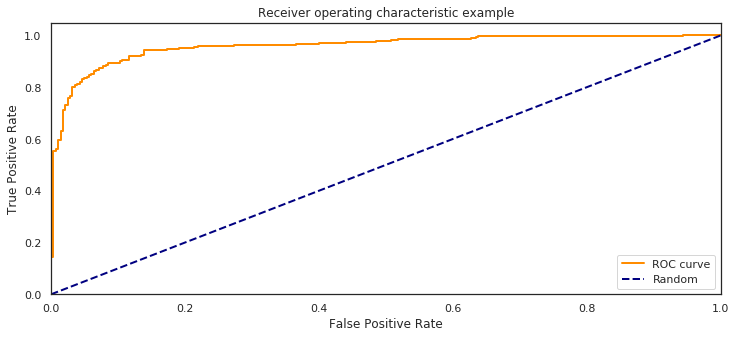

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
plt.figure();
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

---

### Tasks:

- Train another model and plot the ROC curve. (bonus, plot the ROC curves for both models on the same plot)
- Which is better?

In [73]:
import sklearn.tree
clf = sklearn.tree.DecisionTreeClassifier().fit(X_train, y_train)
y_proba_new = clf.predict_proba(X_test)[:,1]

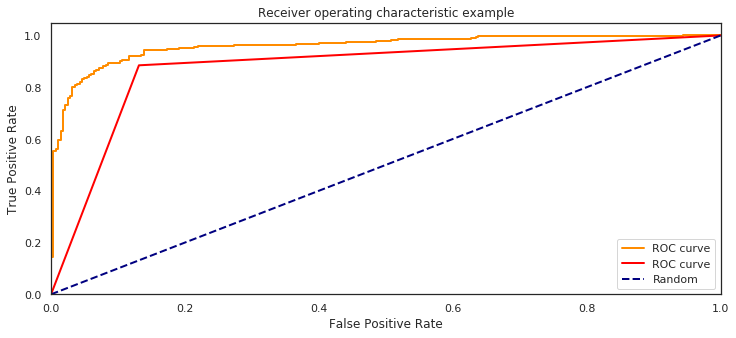

In [74]:
lw = 2
plt.figure();
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_new)
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

---

# Conclusions and Contact

That's it for today. That really was a whistlestop tour of doing Data Science with Python.

As you can imagine, we have only touched the surface here. I could spend full days talking about each of these chapters.

I hope you've enjoyed it. I hope this makes you want to learn more!

If you need professional help, my company [Winder Research](https://WinderResearch.com) can assist. Otherwise, feel free to get in touch using the contact details at the top.

Thanks,
Phil